In [ ]:
pip install pydotplus

In [103]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pydotplus
import plotly.express    as px

from six             import StringIO
from IPython.display import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline                import Pipeline
from sklearn.impute                  import SimpleImputer, KNNImputer
from sklearn.preprocessing           import StandardScaler, OneHotEncoder, normalize
from sklearn.model_selection         import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics                 import mean_squared_error, mean_squared_log_error, accuracy_score
from sklearn.metrics                 import plot_confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree         import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble     import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm          import SVC
from xgboost              import XGBClassifier

import warnings
warnings.filterwarnings('ignore')




In [52]:
def run_model(model, X_train, y_train, X_test, y_test, fi=False):

    # fitting
    model.fit(X_train, y_train)

    # predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    print(classification_report(y_train, y_hat_train))
    print(classification_report(y_test, y_hat_test))
    
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

    plot_confusion_matrix(model, X_train, y_train, ax=ax0)
    plot_confusion_matrix(model, X_test, y_test, ax=ax1)

    ax0.title.set_text('Train Confusion Matrix')
    ax1.title.set_text('Test Confusion Matrix')
    
    if fi == True:
        
        print('\033[1m' + 'Feature Importances:' + '\n' + '\033[0m')
        fi = sorted(list(zip(model.feature_importances_, X_train.columns)))[-20:]
        fi = pd.DataFrame(fi, columns=['impt', 'name'])
        ax2.barh(fi.name, fi.impt)
        ax2.title.set_text('Feature Importances')
        
    return model

In [25]:
data = pd.read_csv('finalmodeling')

In [26]:
y = data['my_music']
X = data.drop(columns=['my_music'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       ...
       'genre_techhouse', 'genre_techno', 'genre_trance', 'genre_trap',
       'genre_trap soul', 'genre_uk alternative pop',
       'genre_uk contemporary r&b', 'genre_uk hip hop', 'genre_unknown',
       'genre_vapor pop'],
      dtype='object', length=290)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2974
           1       0.91      0.99      0.95      2410

    accuracy                           0.95      5384
   macro avg       0.95      0.96      0.95      5384
weighted avg       0.96      0.95      0.95      5384

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       740
           1       0.92      0.99      0.95       606

    accuracy                           0.96      1346
   macro avg       0.96      0.96      0.96      1346
weighted avg       0.96      0.96      0.96      1346

Feature Importances:



DecisionTreeClassifier(max_depth=10)

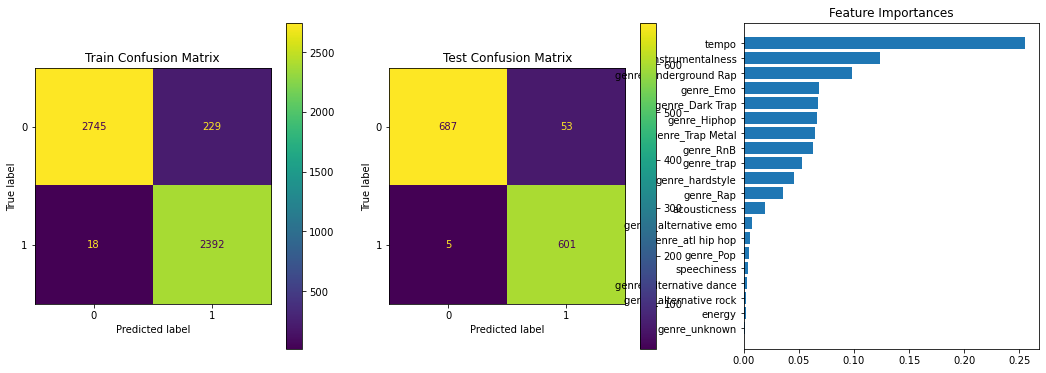

In [45]:
dtree = DecisionTreeClassifier(max_depth=10)

run_model(dtree, X_train, y_train, X_test, y_test, fi = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       740
           1       0.99      0.99      0.99       606

    accuracy                           0.99      1346
   macro avg       0.99      0.99      0.99      1346
weighted avg       0.99      0.99      0.99      1346

Feature Importances:



RandomForestClassifier()

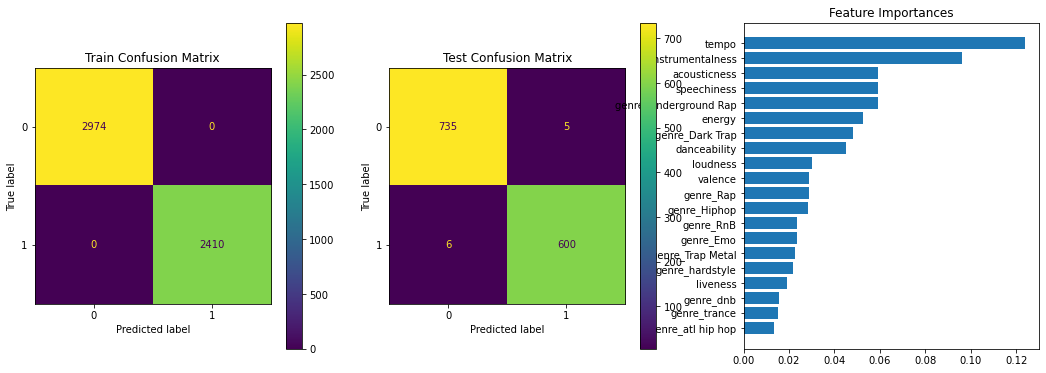

In [54]:
model = RandomForestClassifier()

run_model(model, X_train, y_train, X_test, y_test, fi = True)

In [31]:
fi = sorted(list(zip(dtree.feature_importances_, X_train.columns)))
fi = pd.DataFrame(fi, columns=['impt', 'name'])
fi

,impt,name
0,0.000000,danceability
1,0.000000,genre_a cappella
2,0.000000,genre_acoustic chill
3,0.000000,genre_acoustic cover
4,0.000000,genre_acoustic pop
...,...,...
284,0.067872,genre_Dark Trap
285,0.068100,genre_Emo
286,0.098012,genre_Underground Rap
287,0.123785,instrumentalness


In [57]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)  
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       740
           1       0.99      0.99      0.99       606

    accuracy                           0.99      1346
   macro avg       0.99      0.99      0.99      1346
weighted avg       0.99      0.99      0.99      1346

Feature Importances:



RandomForestClassifier()

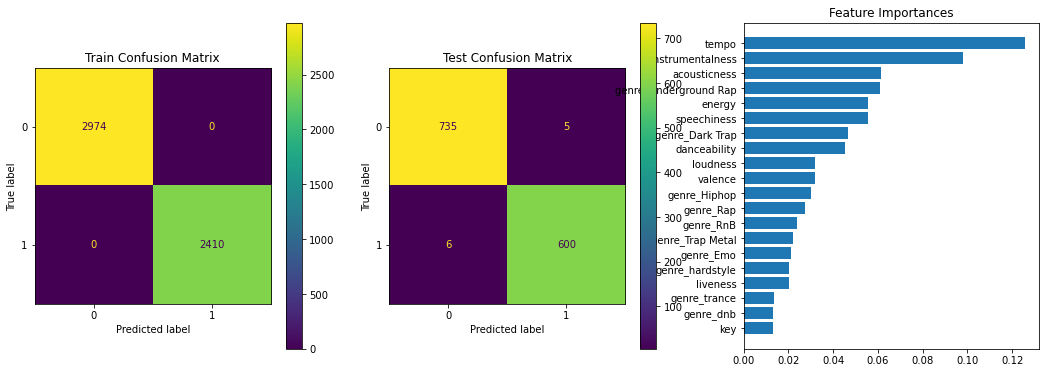

In [58]:
model = RandomForestClassifier()

run_model(model, X_train_scaled, y_train, X_test_scaled, y_test, fi = True)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2974
           1       0.86      0.77      0.82      2410

    accuracy                           0.84      5384
   macro avg       0.85      0.84      0.84      5384
weighted avg       0.85      0.84      0.84      5384

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       740
           1       0.79      0.70      0.74       606

    accuracy                           0.78      1346
   macro avg       0.78      0.77      0.78      1346
weighted avg       0.78      0.78      0.78      1346



KNeighborsClassifier()

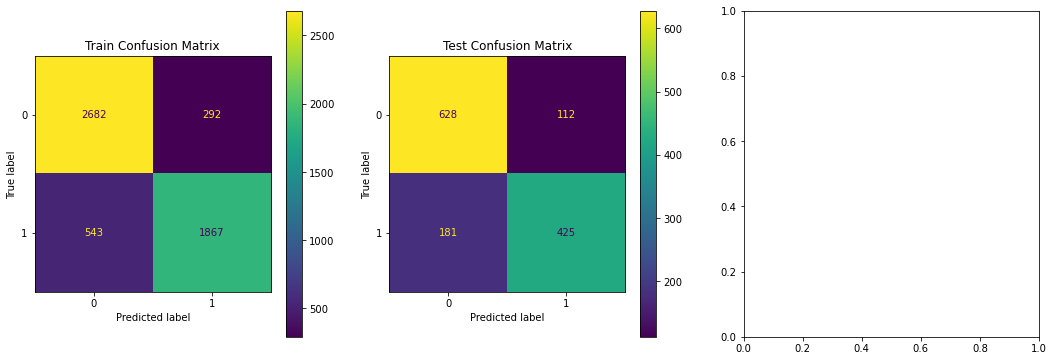

In [48]:
model = KNeighborsClassifier()

run_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       740
           1       1.00      0.95      0.97       606

    accuracy                           0.98      1346
   macro avg       0.98      0.97      0.98      1346
weighted avg       0.98      0.98      0.98      1346



GaussianNB()

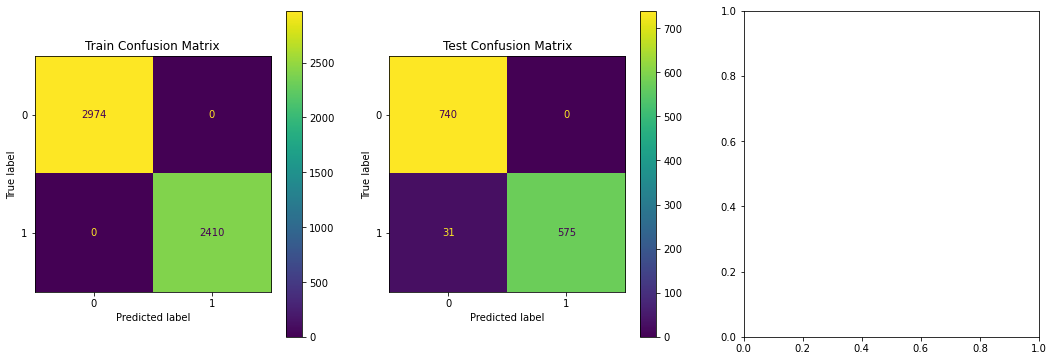

In [49]:
model = GaussianNB()

run_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2974
           1       1.00      0.98      0.99      2410

    accuracy                           0.99      5384
   macro avg       0.99      0.99      0.99      5384
weighted avg       0.99      0.99      0.99      5384

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.99      0.99       606

    accuracy                           0.99      1346
   macro avg       1.00      0.99      0.99      1346
weighted avg       0.99      0.99      0.99      1346

Feature Importances:



GradientBoostingClassifier()

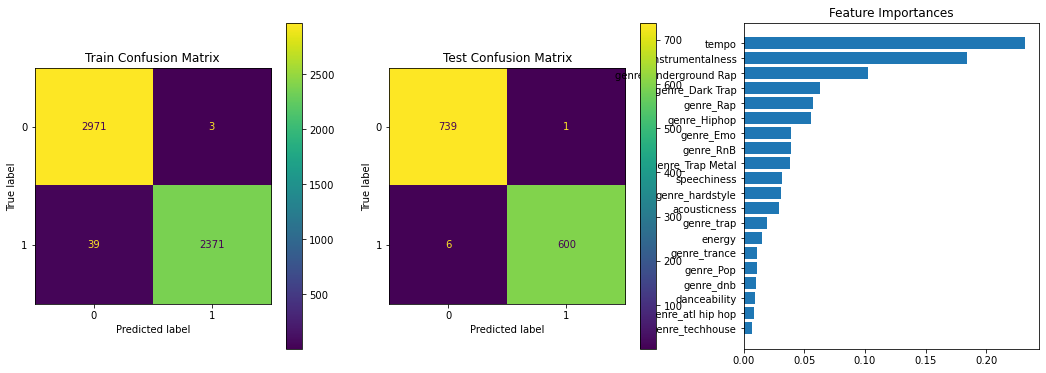

In [53]:
Gboost = GradientBoostingClassifier()

run_model(Gboost, X_train, y_train, X_test, y_test, fi = True)

In [59]:
mean_rf_cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=3))
mean_rf_cv_score

0.9840266067951667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.99      1.00       606

    accuracy                           1.00      1346
   macro avg       1.00      1.00      1.00      1346
weighted avg       1.00      1.00      1.00      1346



BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42))

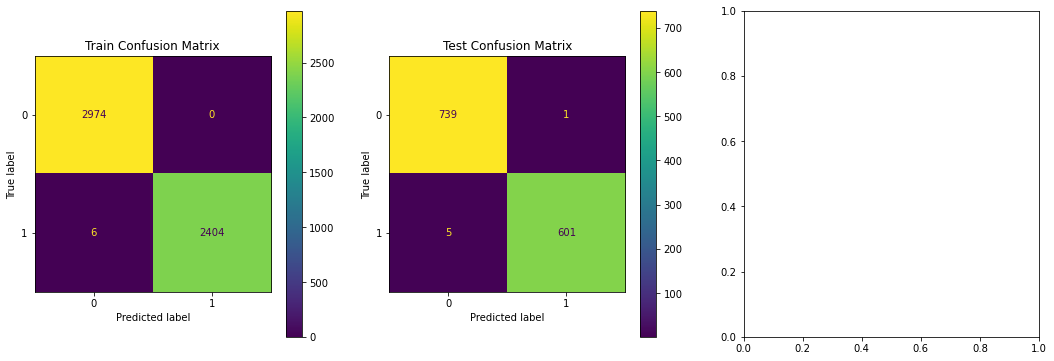

In [65]:
model = BaggingClassifier(DecisionTreeClassifier(random_state=42))
run_model(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       606

    accuracy                           1.00      1346
   macro avg       1.00      1.00      1.00      1346
weighted avg       1.00      1.00      1.00      1346

Feature Importances:



AdaBoostClassifier()

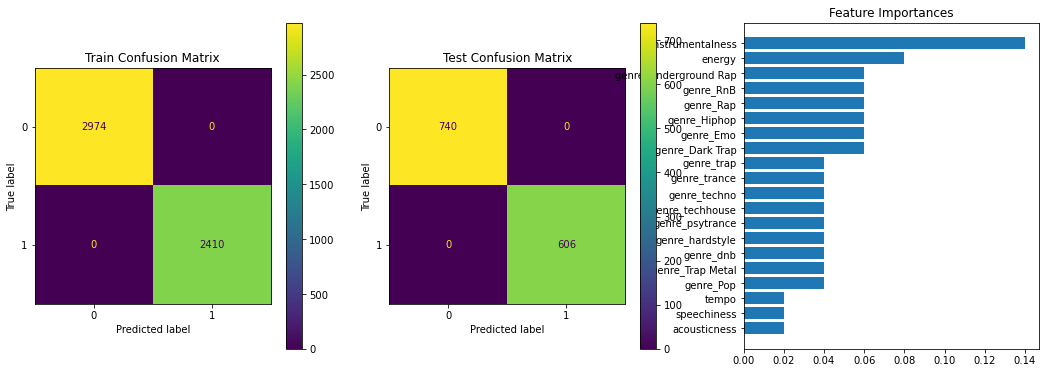

In [63]:
model = AdaBoostClassifier()
run_model(model, X_train_scaled, y_train, X_test_scaled, y_test, fi = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       606

    accuracy                           1.00      1346
   macro avg       1.00      1.00      1.00      1346
weighted avg       1.00      1.00      1.00      1346

Feature Importances:



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

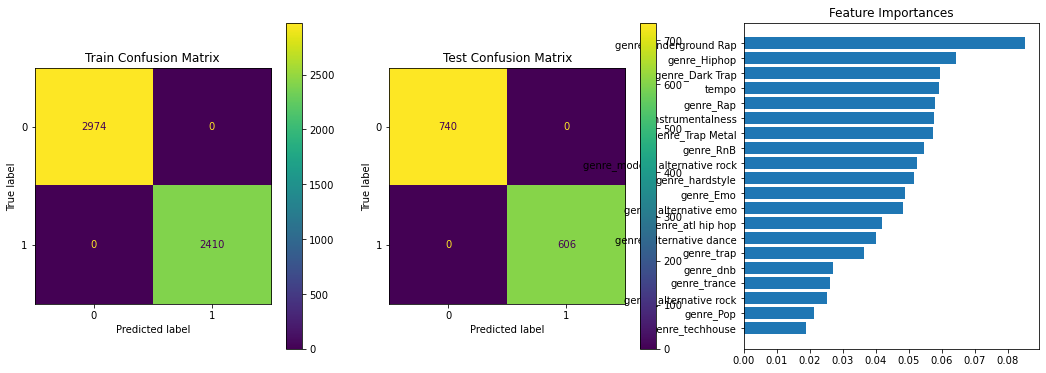

In [67]:
model = XGBClassifier()
run_model(model, X_train, y_train, X_test, y_test, fi = True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       740
           1       1.00      0.95      0.97       606

    accuracy                           0.98      1346
   macro avg       0.98      0.97      0.98      1346
weighted avg       0.98      0.98      0.98      1346



SVC(random_state=42)

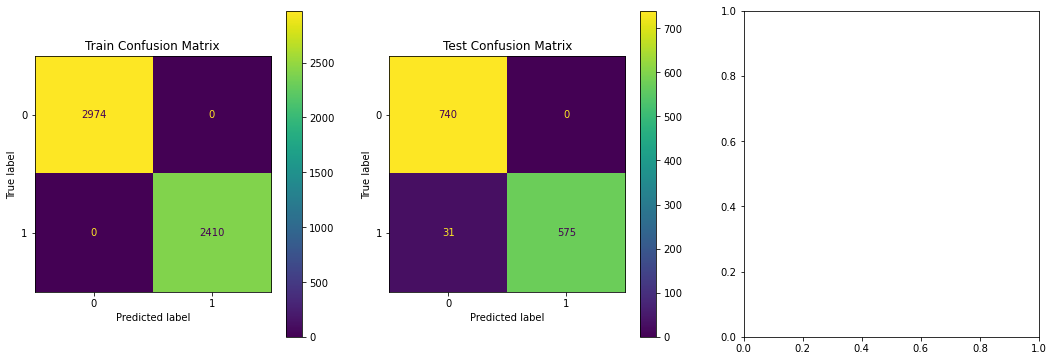

In [70]:
model = SVC(random_state=42)

run_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   53.5s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2974
           1       1.00      1.00      1.00      2410

    accuracy                           1.00      5384
   macro avg       1.00      1.00      1.00      5384
weighted avg       1.00      1.00      1.00      5384

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.99      0.99       606

    accuracy                           0.99      1346
   macro avg       1.00      0.99      0.99      1346
weighted avg       0.99      0.99      0.99      1346

Feature Importances:



AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

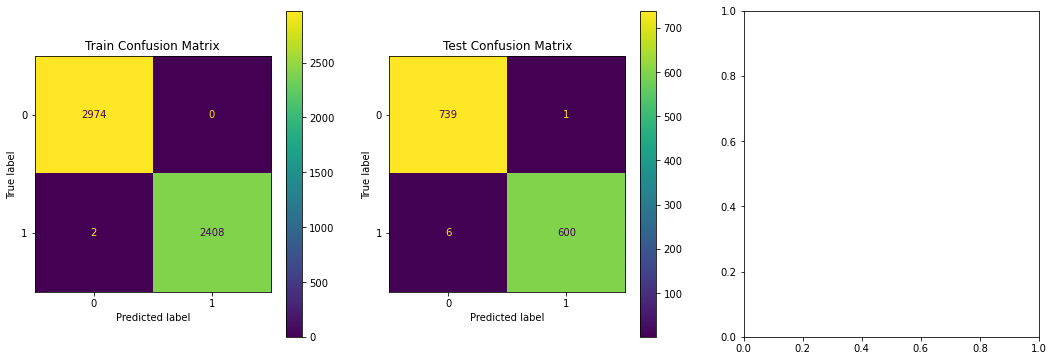

In [61]:
bc_grid = {'n_estimators': [10, 20, 30, 40, 50], 'oob_score':['True', 'False']}
model   = GridSearchCV(BaggingClassifier(), bc_grid, scoring='accuracy', verbose=1)

run_model(model, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.7min finished


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2974
           1       0.97      0.89      0.93      2410

    accuracy                           0.94      5384
   macro avg       0.94      0.93      0.94      5384
weighted avg       0.94      0.94      0.94      5384

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       740
           1       0.96      0.89      0.92       606

    accuracy                           0.93      1346
   macro avg       0.94      0.93      0.93      1346
weighted avg       0.94      0.93      0.93      1346



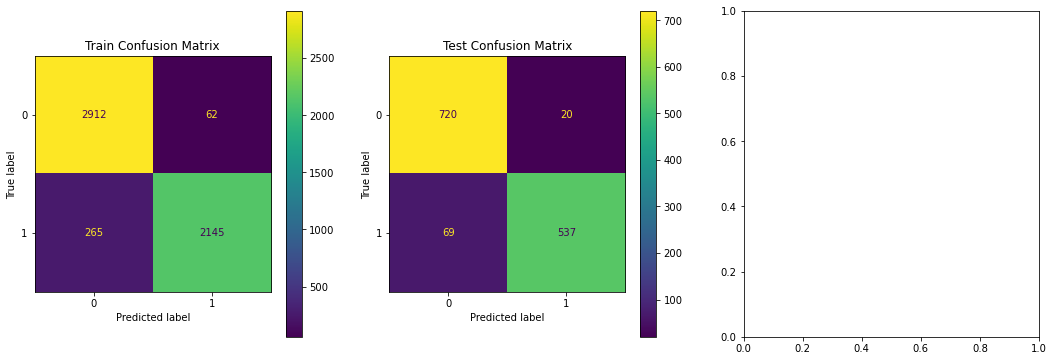

In [71]:
rfc_grid = {'n_estimators': [100, 200], 'criterion':['gini', 'entropy'], 
            'oob_score':['True', 'False'], 'max_depth': [3, 4, 5, 6, 7, 8]}
model    = GridSearchCV(RandomForestClassifier(), rfc_grid, scoring='accuracy', verbose=1)

rfc_gs   = run_model(model, X_train, y_train, X_test, y_test)

In [72]:
rfc_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'n_estimators': 100,
 'oob_score': 'True'}

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.0s finished


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2974
           1       1.00      0.98      0.99      2410

    accuracy                           0.99      5384
   macro avg       0.99      0.99      0.99      5384
weighted avg       0.99      0.99      0.99      5384

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       740
           1       0.98      0.98      0.98       606

    accuracy                           0.98      1346
   macro avg       0.98      0.98      0.98      1346
weighted avg       0.98      0.98      0.98      1346



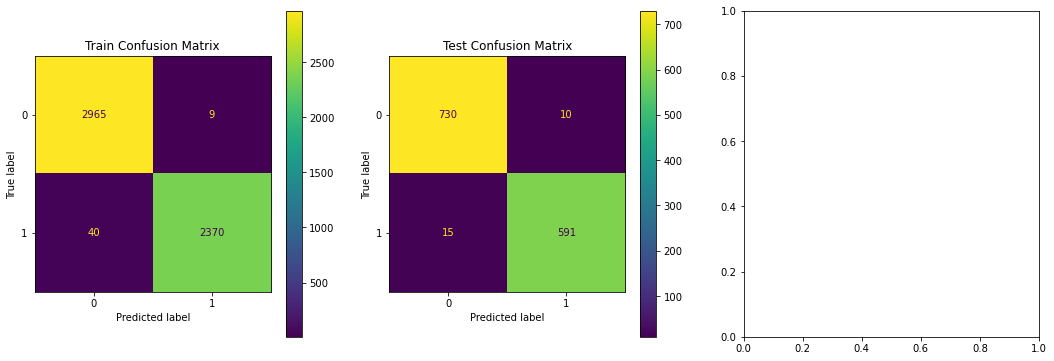

In [93]:
rfc_grid = {'criterion': ['entropy'],'max_depth': [10,15],'n_estimators': [100, 200],'oob_score': ['True']}

model    = GridSearchCV(RandomForestClassifier(), rfc_grid, scoring='accuracy', verbose=1, cv=5)

rfc_gs   = run_model(model, X_train, y_train, X_test, y_test)

In [79]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_techhouse,genre_techno,genre_trance,genre_trap,genre_trap soul,genre_uk alternative pop,genre_uk contemporary r&b,genre_uk hip hop,genre_unknown,genre_vapor pop
count,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,...,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000,6730.000000
mean,0.603976,0.692999,5.347548,-6.906929,0.584993,0.121705,0.178294,0.173415,0.203010,0.376479,...,0.040119,0.037890,0.039673,0.034918,0.000743,0.000149,0.000149,0.000297,0.011738,0.000594
std,0.164476,0.218838,3.653560,3.217631,0.492760,0.121647,0.258547,0.317631,0.170262,0.223063,...,0.196253,0.190945,0.195205,0.183586,0.027249,0.012190,0.012190,0.017238,0.107715,0.024374
min,0.080200,0.015600,0.000000,-34.475000,0.000000,0.023300,0.000001,0.000000,0.013400,0.022800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.489000,0.541000,1.000000,-8.524750,0.000000,0.042100,0.003760,0.000000,0.099125,0.192000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.601000,0.718000,6.000000,-6.481500,1.000000,0.064700,0.042950,0.000047,0.129000,0.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.730000,0.887000,9.000000,-4.766500,1.000000,0.158750,0.247000,0.111750,0.263000,0.533000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.979000,1.000000,11.000000,1.421000,1.000000,0.954000,0.995000,0.982000,0.991000,0.976000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we've done some modeling, we should take a look at a few key features that seem to pop out. What exactly makes these features important, and how do they compare when looking at music that isn't mine?

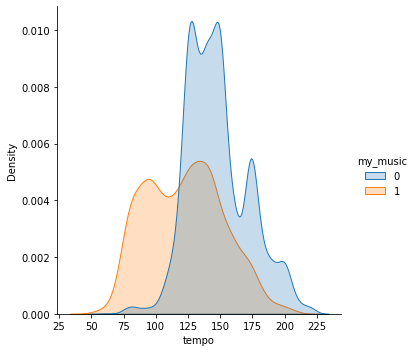

In [88]:
sns.displot(data=data, x='tempo', hue = 'my_music', kind='kde', fill=True);

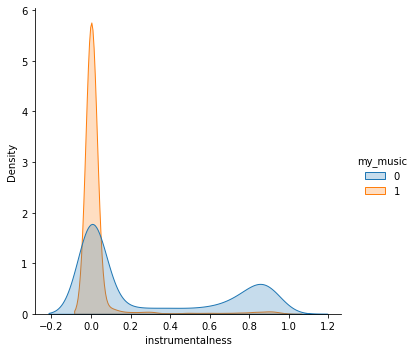

In [89]:
sns.displot(data=data, x='instrumentalness', hue = 'my_music', kind='kde', fill=True);

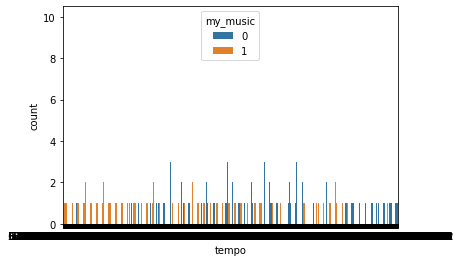

In [90]:
sns.countplot(data=data, x="tempo", hue="my_music");

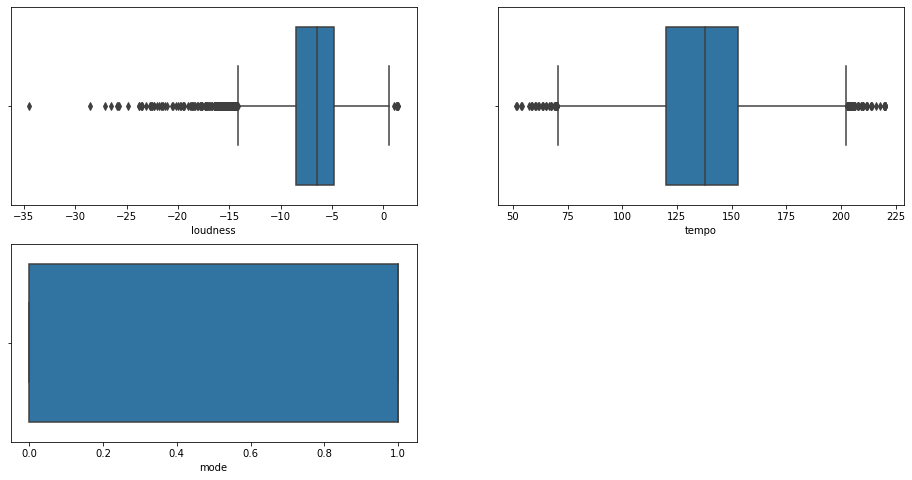

In [99]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=data['loudness'])
plt.subplot(222)
sns.boxplot(x=data['tempo'])
plt.subplot(223)
sns.boxplot(x=data['mode']);